In [1]:
import random
import numpy as np
import pandas as pd
import re

import seaborn as sns
import matplotlib.pyplot as plt

from local_libs.Get_Categories import CategorySelector
from local_libs.color_filter import bcolors as cf
from local_libs.clear_data import clear_data

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import nltk

#Downloads necessários para executar o código
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import warnings
warnings.simplefilter('ignore', UserWarning)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\augus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\augus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\augus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\augus\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
def export_dataset():
    #Lista de links (arquivos estão dentro do Google Sheets)
    test_links = {
        'link_01': 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQvClyfCtk8JD82zXYSipnN7iCJ0XG0V-z6tcII_14W7tQYPpLLOK45kKWLQf8TBfyRNhH9mlEXiowR/pub?output=csv',
        'link_02': 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQq0fLn7Dkg0-Lg2i9FUD0iL-xLVHn1Gtorx8wLlA7flMftChIJf_PXgziaHshCnxlX52bZJZ2EKFsu/pub?output=csv'
    }
    train_links ={
        'link_01':'https://docs.google.com/spreadsheets/d/e/2PACX-1vS2E4FyELPrgf1rPIeyh4lzQTOtftYYK6vyr7m5TN7cYDZTo4tLy1jZQ06mnnwo0NrJ5ZR5IOm2-ndN/pub?output=csv',
        'link_02':'https://docs.google.com/spreadsheets/d/e/2PACX-1vT-NHTDb71tp400NvyVObenotd8uUATgPgl4nlGwvqpwTTMoCmc8bH7YmyvmzBg_TcIAxoNkC0upfoe/pub?output=csv',       
        'link_03':'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_vX9ELHWxTt5kPrcZ8LchIXnBrd2QvbsuA5f_cHLWhaSvoa9DERR5W7oKE9489UzfFruwyek2XJvW/pub?output=csv',
        'link_04':'https://docs.google.com/spreadsheets/d/e/2PACX-1vSi7JewvqVkONWiqbFWqyQjTOmtxrsEtZ4ArifmlCMELo9BAPw00BpnZ1BI9wx_ruE4nPbY3egzjEfx/pub?output=csv',
        'link_05':'https://docs.google.com/spreadsheets/d/e/2PACX-1vTooCcyaoXnkazJ6HI95oc-Ll45cMY4qnjh6iIa9HVJfhTej2z9EBDVVHgplEhqLfegmeucud1mXMhS/pub?output=csv'
    }
   
    #Download e leitura do arquivo de treinamento
    temp_df_test = pd.DataFrame()
    for i in test_links:
        file_temp = pd.read_csv(test_links[i])
        temp_df_test = pd.concat([temp_df_test,file_temp]) 
    temp_df_test.reset_index(drop=True, inplace=True)
    temp_df_test.drop('Unnamed: 0',axis=1, inplace= True)

    #Download e leitura do arquivo de teste
    temp_df_train = pd.DataFrame()
    for i in train_links:
        file_temp = pd.read_csv(train_links[i])
        temp_df_train = pd.concat([temp_df_train,file_temp]) 
    temp_df_train.reset_index(drop=True, inplace=True)
    temp_df_train.drop('Unnamed: 0',axis=1, inplace= True)   
   
    return temp_df_test, temp_df_train

test, train = export_dataset()

| Nome da coluna | Tipo | Descrição | Observação |
| :---- | :---- | :--- | :--- |
| test_id | Numérica discreta | Representa o índice do produto | - |
| name | Categórico nominal | Titulo da lista* | - |
| item_condition_id | Catégorico ordinal | Numero que identifica a condição do item | Está em escala de 1 a 5, sendo 1 a melhor e 5 a pior |
| category_name | Categórico nominal | Categorias vinculadas ao produto | - |
| brand_name | Categórico nominal | Nome da marca do item | - |
| price | Numérica discreta | Preço do produto anunciado | Coluna alvo do arquivo teste |
| shipping | Categórico nominal | Identifica quem pagou a taxa de envio | <p>1 - Vendedor</p><p> 0 - Comprador</p> |
| item_description | Categórico nominal | Descrição completa do item* | - |
| date | Categórico ordinal | Data da venda | - |
| stock | Numérico ordinal | Quantidade em estoque | - |

# Primeiras informações sobre o dataset

In [3]:
#Função responsável por montagem de gráfico de barras
#Caso countplot seja igual a "False", é necessário forncer um y
def criar_barplot(dados,titulo, x , y = None , countplot = False):
  if countplot == False:
    fig = sns.barplot(x=x,y=y,data=dados)
    fig.figure.set_size_inches(24,6)
    fig.set_title(titulo,fontsize=18)
    fig.set_xlabel('Categoria',fontsize=14)
    fig.set_ylabel('Quantidade',fontsize=14)
  else:
    fig = sns.countplot(x=x,data=dados)
    fig.figure.set_size_inches(24,6)
    fig.set_title(titulo,fontsize=18)
    fig.set_xlabel('Categoria',fontsize=14)
    fig.set_ylabel('Quantidade',fontsize=14)
  return fig

<AxesSubplot:title={'center':'Quantidade total dividos por qualidade do item'}, xlabel='Categoria', ylabel='Quantidade'>

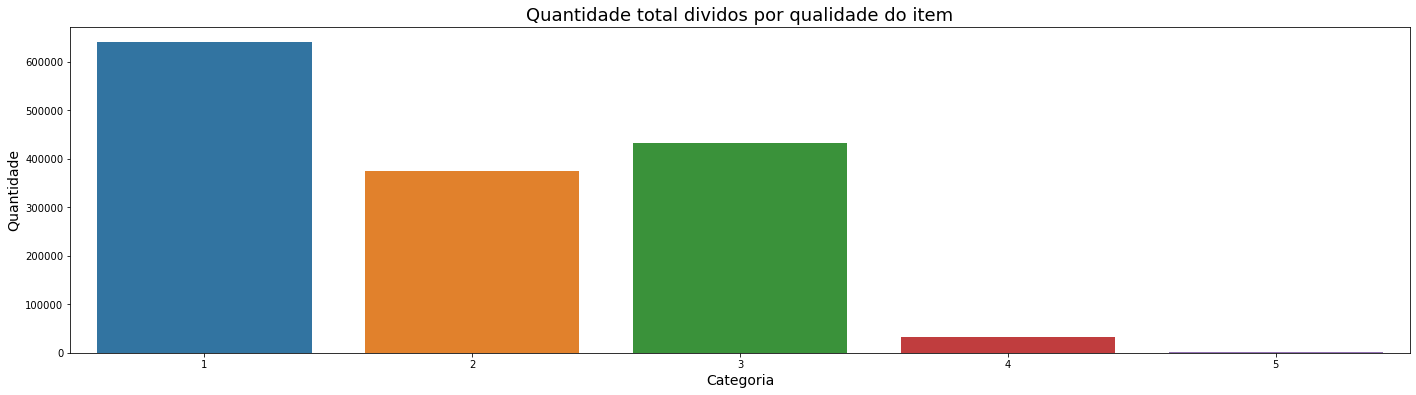

In [4]:
criar_barplot(train, 'Quantidade total dividos por qualidade do item', x = 'item_condition_id', countplot=True)

In [48]:
print('Information about train')
print('\n')
print(f'\tNumber of samples: {cf.GREEN}{train.shape[0]}{cf.ENDC} | Number of columns: {cf.GREEN}{train.shape[1]}{cf.ENDC} ')
print(f'\tTrain column names: {cf.BOLD}{list(train.columns)}{cf.ENDC}')
print('\n')
print('__________________________________________________________________')
print('\n')
print('Information about test')
print('\n')
print(f'\tNumber of samples: {cf.GREEN}{test.shape[0]}{cf.ENDC} | Number of columns: {cf.GREEN}{test.shape[1]}{cf.ENDC} ')
print(f'\tTrain column names: {cf.BOLD}{list(test.columns)}{cf.ENDC}')

Information about train


	Number of samples: 1182605 | Number of columns: 15 
	Train column names: ['name', 'item_condition_id', 'category_name', 'brand_name', 'price', 'shipping', 'item_description', 'date', 'stock', 'date2', 'day', 'month', 'year', 'description_clear', 'name_clear']


__________________________________________________________________


Information about test


	Number of samples: 693359 | Number of columns: 9 
	Train column names: ['test_id', 'name', 'item_condition_id', 'category_name', 'brand_name', 'shipping', 'item_description', 'date', 'stock']


In [6]:
print('Information about train')
print('\n')
print(train.info())
print('\n')
print('__________________________________________________________________')
print('\n')
print('Information about test')
print('\n')
print(test.info())

Information about train


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476256 non-null  object 
 4   brand_name         850368 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
 8   date               1482535 non-null  object 
 9   stock              1482535 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 113.1+ MB
None


__________________________________________________________________


Information about test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (tota

## Limpeza de dados

In [7]:
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [8]:
train = clear_data(train)

In [9]:
# funcao para tratar cada palavra e remover stopwords
def processamento(tokens):
    
    token_processado = []
    for token in tokens:
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        
        if token not in stop_words:
            token = stemmer.stem(token)
            token_processado.append(token)
        
    return token_processado

# expressao regular para remover pontuacoes do texto da coluna 
description = train['item_description']
documentos_descript = []
for descript in description:
    
    # expressao regular para remover pontuacoes do texto item_description
    descript = re.sub(r'[^\w\s]','', descript)
    tokens = processamento(word_tokenize(descript))
    
    documentos_descript.append(' '.join(tokens))

In [10]:
# expressao regular para remover pontuacoes do texto da coluna name
name_2 = train['name']
documentos_name = []
for name_3 in name_2:
    
    
    sinopse = re.sub(r'[^\w\s]','', name_3)
    tokens = processamento(word_tokenize(name_3))
    
    documentos_name.append(' '.join(tokens))

In [11]:
#criando a coluna documento_descript
train['description_clear'] = documentos_descript
train['name_clear'] = documentos_name

In [15]:
#remoção dos itens duplicados
index_duplicated = train[train[['category_name', 'name_clear','description_clear','date','price']].duplicated()].index
train = train.drop(index_duplicated, axis=0).reset_index(drop=True)

In [16]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,date,stock,date2,day,month,year,description_clear,name_clear
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,Other,10.0,1,No description yet,17-5-2018,27,2018-05-17,17,5,2018,descript yet,mlb cincinnati red shirt size xl
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,17-3-2018,15,2018-03-17,17,3,2018,keyboard great condit work like came box port ...,razer blackwidow chroma keyboard
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,24-10-2018,14,2018-10-24,24,10,2018,ador top hint lace key hole back pale pink 1x ...,ava-viv blous
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,Other,35.0,1,New with tags. Leather horses. Retail for [rm]...,19-2-2018,1,2018-02-19,19,2,2018,new tag leather hors retail rm stand foot high...,leather hors statu
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,Other,44.0,0,Complete with certificate of authenticity,16-4-2018,13,2018-04-16,16,4,2018,complet certif authent,24k gold plate rose


# Seletor de categorias

<p style = 'color:red'>Para maiores informações: /local_libs/Get_Categories.py</p>
<p style = 'color:red'>For more informations: /local_libs/Get_Categories.py</p>


In [17]:
# Chamando a classe de seleção de categorias
# Fornecendo as informações principais, sendo que elas são:
# main_frame, a base principal de dados
# column, coluna alvo que servirá de base para seleção de categorias
# main_category_name, retorna uma lista com apenas os nomes das categorias principais
# return_first_category, retorna uma dataframe com a primeira categoria e suas respectivas contagens
# save_files, retorna os arquivos em fornado .csv (verificar armazenamento interno)
# O output da função "get_categories", caso return_first_category são duas variáveis
# second_category_dict é um dicionário em que:

#       A chave do dicionário é uma categoria principal
#       Os dados dentro da chave são todas as linhas da base de dados que tem como categoria principal a chave do dicionário
#       Esses dados precisam ser reindexados

general_selector = CategorySelector(train , train['category_name'], return_first_category=True, save_files=True)
first_category , second_category_dict = general_selector.get_categories()

In [18]:
first_category

,category_name,Count
0,Women,531382
1,Beauty,165981
2,Kids,137428
3,Electronics,98063
4,Men,74819
5,Home,54316
6,Other,38537
7,Vintage & Collectibles,37235
8,Handmade,24584
9,Sports & Outdoors,20260


# Primeira categoria

<AxesSubplot:title={'center':'Quantitativo de categorias primárias'}, xlabel='Categoria', ylabel='Quantidade'>

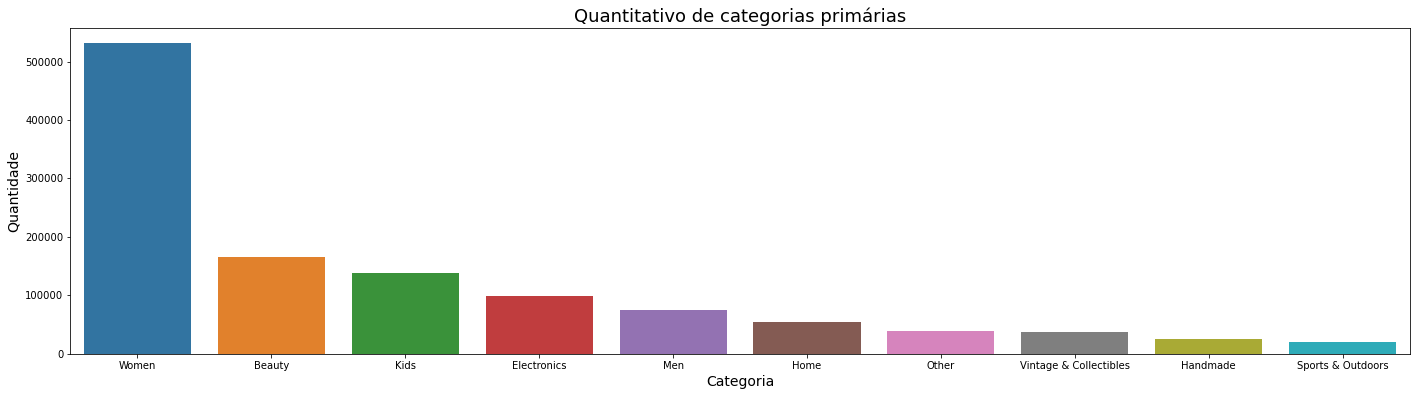

In [19]:
criar_barplot(first_category, 'Quantitativo de categorias primárias', x = 'category_name', y = 'Count')

# Categoria Homem | "Men"

In [20]:
# Já que será chamado uma função secundária da classe, é preciso apenas chamar a classe, não inicia-la
selector = CategorySelector

In [21]:
# É realizado uma limpeza dentro das categorias que apenas contém a categoria principal de homem
# Todos os códigos posteriores respeitam essa linha de raciocínio 
# É acessado o dicionário através do nome de uma categoria principal como chave, acessado a coluna de categorias e reinciado o index, como citado anteriormente
# É passado a função name_and_count_category_level, para mais informações de funcionamento visualizar /local_libs/Get_Categories.py, sendo que o output é:
#       Um dataframe com a contagem e os nomes de cada categoria
#       Um dataframe com a porcentagem e os nomes de cada categoria
#       Seria possível ter os nomes das categorias, mas já que as outras funções já fazem isso não se fez necessário, então foi ignorado esse output

column_men = second_category_dict['Men']['category_name'].reset_index(drop=True)
men_subcategories_count, __ , men_subcategories_percentage = selector.name_and_count_category_level(column_men, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Men{cf.ENDC}')
men_subcategories_count

Valores totais dentro da subcategoria Men


,category_name,Count
0,Shoes,18105
1,Tops,16487
2,Men's Accessories,14928
3,Athletic Apparel,8638
4,Sweats & Hoodies,6616
5,Jeans,3087
6,Coats & Jackets,2664
7,Shorts,1177
8,Sweaters,1166
9,Pants,739


In [22]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Men{cf.ENDC}')
men_subcategories_percentage

Valores percentuais da subcategoria Men


,category_name,Percentage
0,Shoes,0.241984
1,Tops,0.220358
2,Men's Accessories,0.199522
3,Athletic Apparel,0.115452
4,Sweats & Hoodies,0.088427
5,Jeans,0.041260
6,Coats & Jackets,0.035606
7,Shorts,0.015731
8,Sweaters,0.015584
9,Pants,0.009877


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Homem'}, xlabel='Categoria', ylabel='Quantidade'>

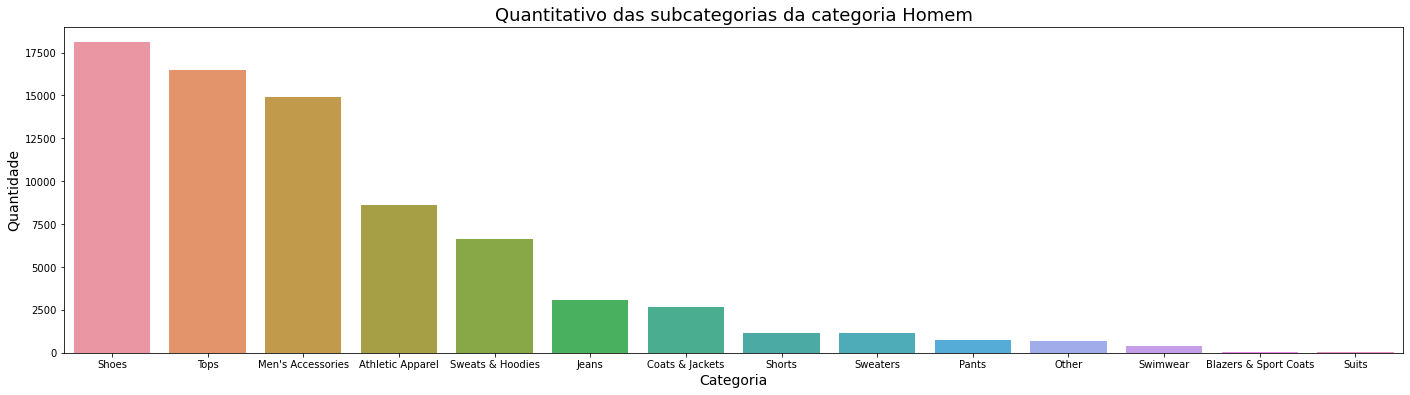

In [23]:
criar_barplot(men_subcategories_count, 'Quantitativo das subcategorias da categoria Homem', x = 'category_name', y='Count')

## Categoria Mulher | "Women"

In [24]:
column_women = second_category_dict['Women']['category_name'].reset_index(drop=True)
women_subcategories_count, __ , women_subcategories_percentage= selector.name_and_count_category_level(column_women, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Women{cf.ENDC}')
women_subcategories_count

Valores totais dentro da subcategoria Women


,category_name,Count
0,Athletic Apparel,98641
1,Tops & Blouses,85543
2,Shoes,62080
3,Jewelry,45456
4,Women's Handbags,36764
5,Dresses,36499
6,Women's Accessories,33925
7,Sweaters,27454
8,Underwear,27028
9,Jeans,25856


In [25]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Woman{cf.ENDC}')
women_subcategories_percentage

Valores percentuais da subcategoria Woman


,category_name,Percentage
0,Athletic Apparel,0.185631
1,Tops & Blouses,0.160982
2,Shoes,0.116827
3,Jewelry,0.085543
4,Women's Handbags,0.069186
5,Dresses,0.068687
6,Women's Accessories,0.063843
7,Sweaters,0.051665
8,Underwear,0.050864
9,Jeans,0.048658


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Mulher'}, xlabel='Categoria', ylabel='Quantidade'>

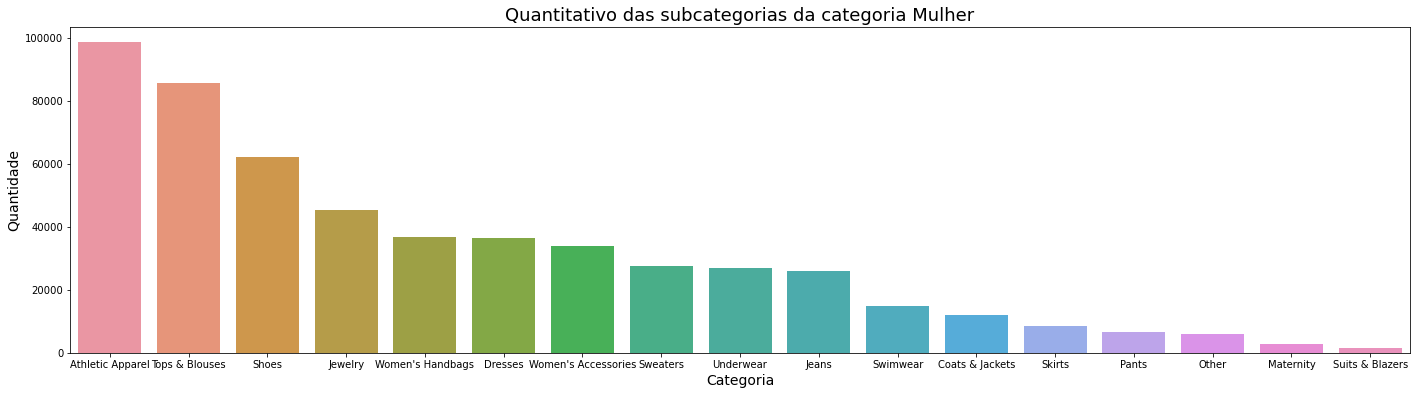

In [26]:
criar_barplot(women_subcategories_count, 'Quantitativo das subcategorias da categoria Mulher', x = 'category_name', y='Count')

# Categoria Antigos e Colecionáveis | "Vintage & Collectibles"

In [27]:
column_vintage_collectibles = second_category_dict['Vintage & Collectibles']['category_name'].reset_index(drop=True)
vintage_collectibles_subcategories_count, __ , vintage_collectibles_subcategories_percentage= selector.name_and_count_category_level(column_vintage_collectibles, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Vintage & Collectibles{cf.ENDC}')
vintage_collectibles_subcategories_count

Valores totais dentro da subcategoria Vintage & Collectibles


,category_name,Count
0,Toy,5903
1,Trading Cards,5196
2,Antique,4865
3,Collectibles,4622
4,Bags and Purses,2525
5,Electronics,2174
6,Clothing,2160
7,Jewelry,2034
8,Accessories,1824
9,Serving,1487


In [28]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Vintage & Collectibles{cf.ENDC}')
vintage_collectibles_subcategories_percentage

Valores percentuais da subcategoria Vintage & Collectibles


,category_name,Percentage
0,Toy,0.158534
1,Trading Cards,0.139546
2,Antique,0.130657
3,Collectibles,0.124131
4,Bags and Purses,0.067813
5,Electronics,0.058386
6,Clothing,0.058010
7,Jewelry,0.054626
8,Accessories,0.048986
9,Serving,0.039936


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Antigos e Colecionáveis'}, xlabel='Categoria', ylabel='Quantidade'>

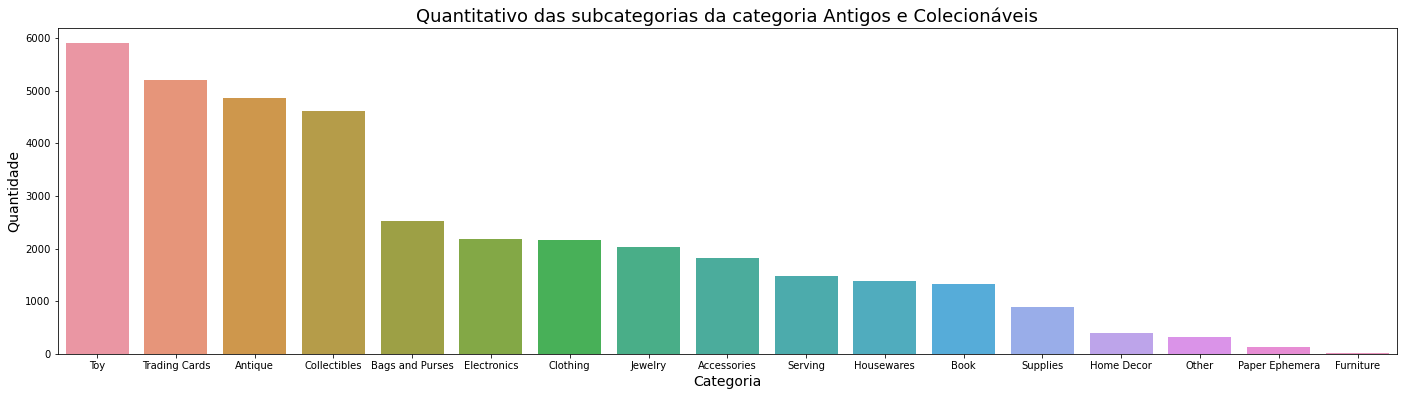

In [29]:
criar_barplot(vintage_collectibles_subcategories_count, 'Quantitativo das subcategorias da categoria Antigos e Colecionáveis', x = 'category_name', y='Count')

# Categoria Feito a mão | "Handmade"

In [30]:
column_handmade = second_category_dict['Handmade']['category_name'].reset_index(drop=True)
handmade_subcategories_count, __ , handmade_subcategories_percentage= selector.name_and_count_category_level(column_handmade, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Handmade{cf.ENDC}')
handmade_subcategories_count

Valores totais dentro da subcategoria Handmade


,category_name,Count
0,Paper Goods,4940
1,Accessories,4792
2,Clothing,4489
3,Bags and Purses,2506
4,Jewelry,1917
5,Children,1012
6,Music,683
7,Art,526
8,Glass,477
9,Weddings,470


In [31]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Handmade{cf.ENDC}')
handmade_subcategories_percentage

Valores percentuais da subcategoria Handmade


,category_name,Percentage
0,Paper Goods,0.200944
1,Accessories,0.194924
2,Clothing,0.182598
3,Bags and Purses,0.101936
4,Jewelry,0.077978
5,Children,0.041165
6,Music,0.027782
7,Art,0.021396
8,Glass,0.019403
9,Weddings,0.019118


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Feito a mão'}, xlabel='Categoria', ylabel='Quantidade'>

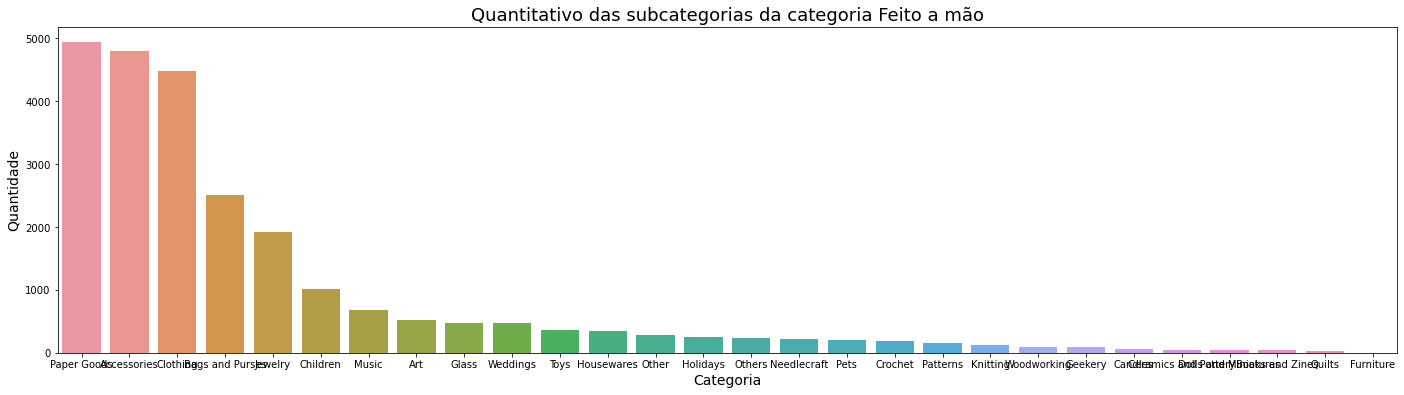

In [32]:
criar_barplot(handmade_subcategories_count, 'Quantitativo das subcategorias da categoria Feito a mão', x = 'category_name', y='Count')

# Categoria Eletronicos | "Electronics"

In [33]:
column_eletronics = second_category_dict['Electronics']['category_name'].reset_index(drop=True)
eletronics_subcategories_count, __ , eletronics_subcategories_percentage= selector.name_and_count_category_level(column_eletronics, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Electronics{cf.ENDC}')
eletronics_subcategories_count

Valores totais dentro da subcategoria Electronics


,category_name,Count
0,Cell Phones & Accessories,42592
1,Video Games & Consoles,28749
2,Media,9268
3,"TV, Audio & Surveillance",7346
4,Computers & Tablets,5926
5,Cameras & Photography,3147
6,Other,607
7,"Car Audio, Video & GPS",428


In [34]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Electronics{cf.ENDC}')
eletronics_subcategories_percentage

Valores percentuais da subcategoria Electronics


,category_name,Percentage
0,Cell Phones & Accessories,0.434333
1,Video Games & Consoles,0.293169
2,Media,0.094511
3,"TV, Audio & Surveillance",0.074911
4,Computers & Tablets,0.060431
5,Cameras & Photography,0.032092
6,Other,0.006190
7,"Car Audio, Video & GPS",0.004365


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Eletronicos'}, xlabel='Categoria', ylabel='Quantidade'>

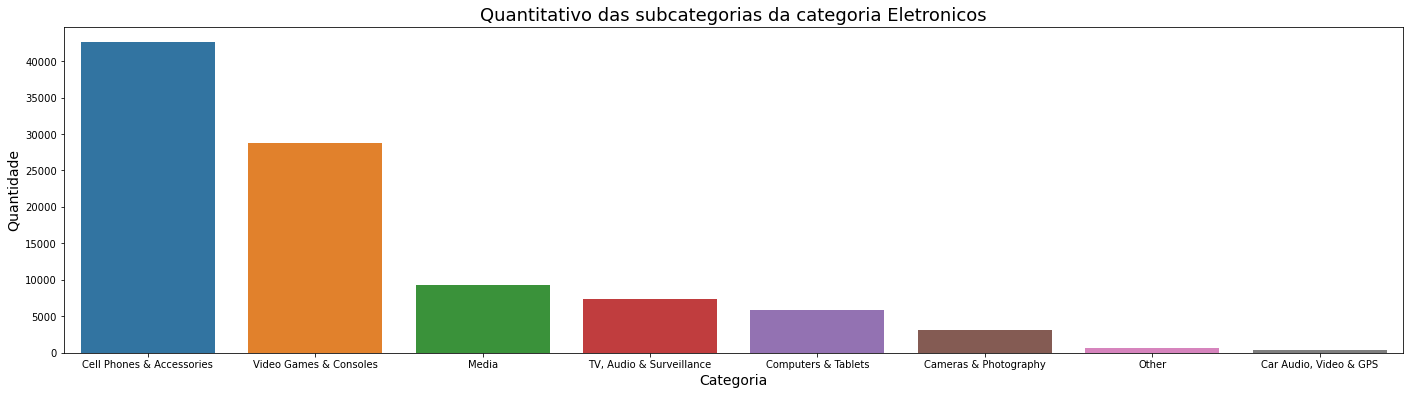

In [35]:
criar_barplot(eletronics_subcategories_count, 'Quantitativo das subcategorias da categoria Eletronicos', x = 'category_name', y='Count')

# Categoria Casa | "Home"

In [36]:
column_home = second_category_dict['Home']['category_name'].reset_index(drop=True)
home_subcategories_count, __ , home_subcategories_percentage= selector.name_and_count_category_level(column_home, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Vintage & Collectibles{cf.ENDC}')
home_subcategories_count

Valores totais dentro da subcategoria Vintage & Collectibles


,category_name,Count
0,Home Décor,20063
1,Kitchen & Dining,17619
2,Seasonal Décor,3911
3,Bedding,3411
4,Storage & Organization,2296
5,Home Appliances,2075
6,Cleaning Supplies,1889
7,Artwork,1014
8,Bath,966
9,Kids' Home Store,542


In [37]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Home{cf.ENDC}')
home_subcategories_percentage

Valores percentuais da subcategoria Home


,category_name,Percentage
0,Home Décor,0.369376
1,Kitchen & Dining,0.324380
2,Seasonal Décor,0.072005
3,Bedding,0.062799
4,Storage & Organization,0.042271
5,Home Appliances,0.038202
6,Cleaning Supplies,0.034778
7,Artwork,0.018669
8,Bath,0.017785
9,Kids' Home Store,0.009979


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Casa'}, xlabel='Categoria', ylabel='Quantidade'>

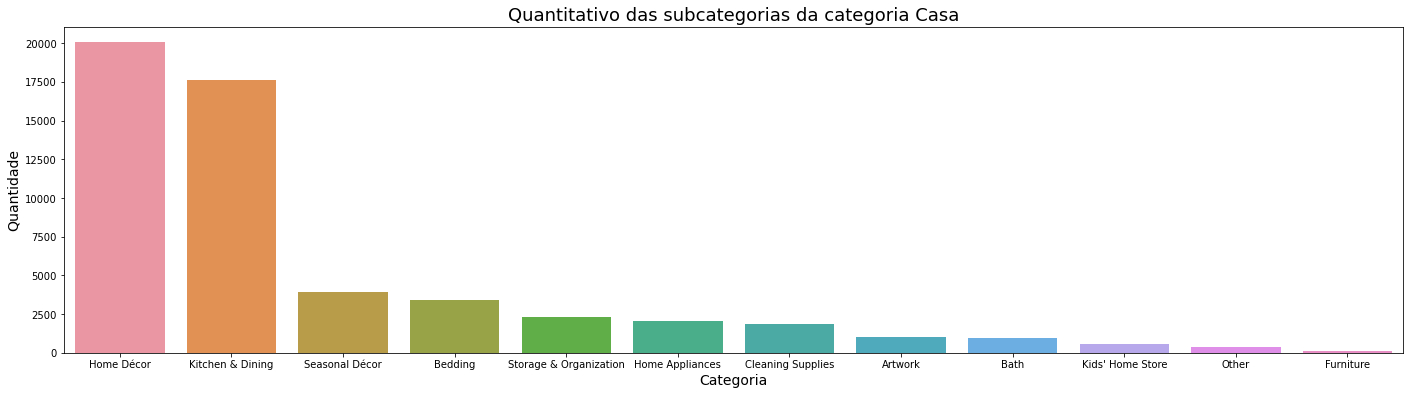

In [38]:
criar_barplot(home_subcategories_count, 'Quantitativo das subcategorias da categoria Casa', x = 'category_name', y='Count')

# Categoria Esportes e ar livre | "Sports & Outdoors"

In [39]:
column_sports_outdoors = second_category_dict['Sports & Outdoors']['category_name'].reset_index(drop=True)
sports_outdoors_subcategories_count, __ , sports_outdoors_subcategories_percentage= selector.name_and_count_category_level(column_sports_outdoors, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Sports & Outdoors{cf.ENDC}')
sports_outdoors_subcategories_count

Valores totais dentro da subcategoria Sports & Outdoors


,category_name,Count
0,Exercise,6405
1,Fan Shop,5034
2,Outdoors,3417
3,Apparel,2316
4,Team Sports,1718
5,Golf,653
6,Footwear,426
7,Other,291


In [40]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Sports & Outdoors{cf.ENDC}')
sports_outdoors_subcategories_percentage

Valores percentuais da subcategoria Sports & Outdoors


,category_name,Percentage
0,Exercise,0.316140
1,Fan Shop,0.248470
2,Outdoors,0.168657
3,Apparel,0.114314
4,Team Sports,0.084798
5,Golf,0.032231
6,Footwear,0.021027
7,Other,0.014363


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Esportes e ar livre'}, xlabel='Categoria', ylabel='Quantidade'>

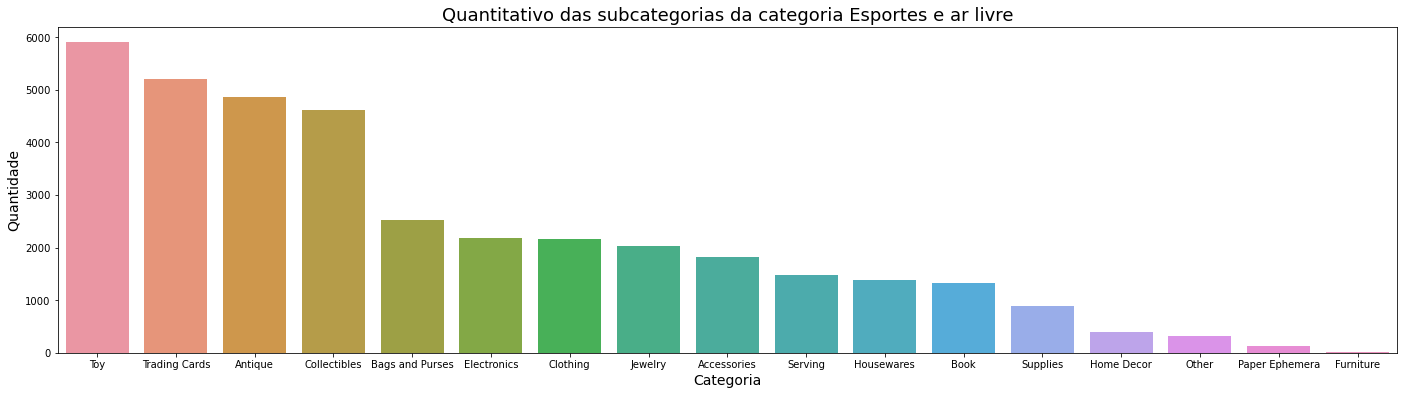

In [41]:
criar_barplot(vintage_collectibles_subcategories_count, 'Quantitativo das subcategorias da categoria Esportes e ar livre', x = 'category_name', y='Count')

# Categoria Beleza | "Beauty"

In [42]:
column_beauty = second_category_dict['Beauty']['category_name'].reset_index(drop=True)
beauty_subcategories_count, __ , beauty_subcategories_percentage= selector.name_and_count_category_level(column_beauty, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Beauty{cf.ENDC}')
beauty_subcategories_count

Valores totais dentro da subcategoria Beauty


,category_name,Count
0,Makeup,99560
1,Skin Care,23748
2,Fragrance,19407
3,Tools & Accessories,10467
4,Bath & Body,6214
5,Hair Care,6207
6,Other,378


In [43]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Beauty{cf.ENDC}')
beauty_subcategories_percentage

Valores percentuais da subcategoria Beauty


,category_name,Percentage
0,Makeup,0.599828
1,Skin Care,0.143077
2,Fragrance,0.116923
3,Tools & Accessories,0.063061
4,Bath & Body,0.037438
5,Hair Care,0.037396
6,Other,0.002277


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Beleza'}, xlabel='Categoria', ylabel='Quantidade'>

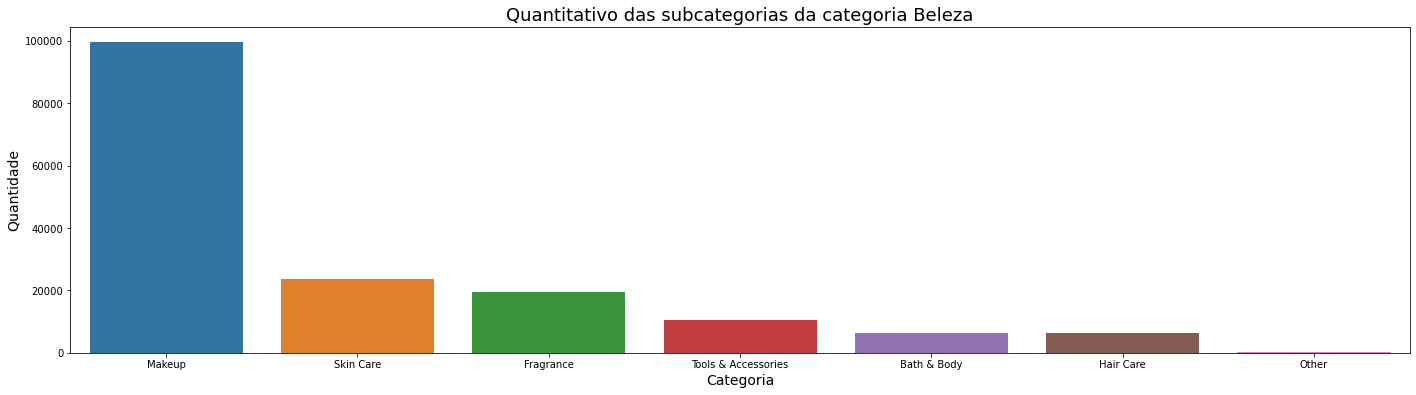

In [44]:
criar_barplot(beauty_subcategories_count, 'Quantitativo das subcategorias da categoria Beleza', x = 'category_name', y='Count')

# Categoria Infantil | "Kids"

In [45]:
column_kids = second_category_dict['Kids']['category_name'].reset_index(drop=True)
kids_subcategories_count, __ , kids_subcategories_percentage= selector.name_and_count_category_level(column_kids, 1, percentage=True)
print(f'Valores totais dentro da subcategoria {cf.BLUE}Kids{cf.ENDC}')
kids_subcategories_count

Valores totais dentro da subcategoria Kids


,category_name,Count
0,Toys,46289
1,Girls 2T-5T,14682
2,Girls 0-24 Mos,14374
3,Boys 0-24 Mos,12278
4,Girls (4+),12175
5,Boys (4+),11834
6,Boys 2T-5T,11468
7,Feeding,3613
8,Diapering,2847
9,Gear,2393


In [46]:
print(f'Valores percentuais da subcategoria {cf.BLUE}Kids{cf.ENDC}')
kids_subcategories_percentage

Valores percentuais da subcategoria Kids


,category_name,Percentage
0,Toys,0.336824
1,Girls 2T-5T,0.106834
2,Girls 0-24 Mos,0.104593
3,Boys 0-24 Mos,0.089341
4,Girls (4+),0.088592
5,Boys (4+),0.086111
6,Boys 2T-5T,0.083447
7,Feeding,0.026290
8,Diapering,0.020716
9,Gear,0.017413


<AxesSubplot:title={'center':'Quantitativo das subcategorias da categoria Infantil'}, xlabel='Categoria', ylabel='Quantidade'>

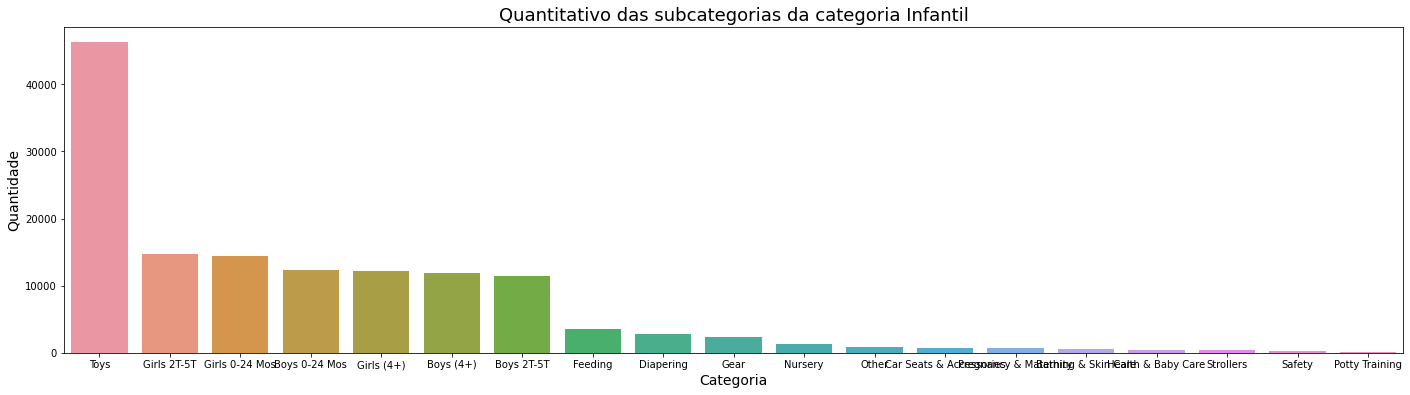

In [47]:
criar_barplot(kids_subcategories_count, 'Quantitativo das subcategorias da categoria Infantil', x = 'category_name', y='Count')

# Considerações finais

## Principais desafios

- Construção das hipóteses
- Definição das atividades
- Otimização de processos
- Identificar padrões de preço levando em relação os produtos anunciados
- Trabalhar com ferramentas novas como mirro e trello
- Analisar os dados, identificando valores nulos e duplicados

## Observações

- Neste sprint foi utilizado o arquivo completo para os estudos preeliminares, todavia, para estudos posteriores, serão utilizados arquivos que estão divididos através das categorias principais.